# SPACESHIP TITANIC

**Predict which passengers are transported to an alternate dimension**

## Table of Contents
<ul>
<li><a href="#intro">INTRODUCTION</a></li>
<li><a href="#wrangling">DATA WRANGLING</a></li>
<li><a href="#eda">EXPLORATORY DATA ANALYSIS</a></li>
<li><a href="#conclusions">CONCLUSIONS</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION

The data analysed in this notebook is made up of 8693 passengers who boarded the the Spaceship Titanic. Spaceship Titanice had almost 13,000 passengers on board, the vessel was transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension.

The Dataset will be used to answer the following questions:
* How does the homeplanet of the passenger impact whether they were transported to a new dimension
* How does whether or not a passenger cryoslept impact whether they were transported to a new dimension
* How does the VIP status of a passenger impact whether they were transported to a new dimension
* How does the age of the passenger impact whether they were transported to a new dimension

In [1]:
# IMPORT PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

<a id='wrangling'></a>
## DATA WRANGLING

In [2]:
# READ DATASETS

df_train = pd.read_csv('train.csv')

In [3]:
# Number of Rows & Columns in the Dataset

df_train.shape

(8693, 14)

In [4]:
# Number of Rows with Missing Values

df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# Datatypes of the Columns

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


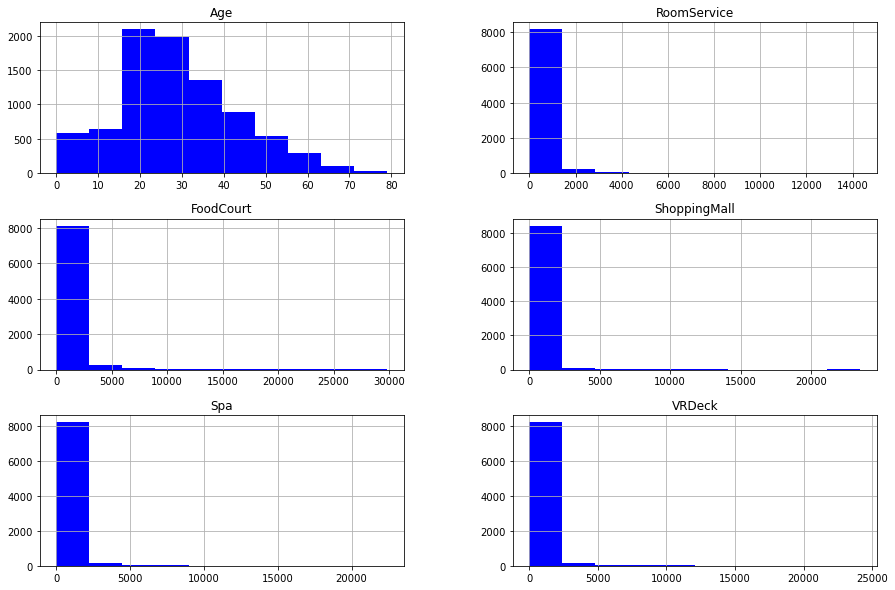

In [6]:
# Create histogram of numerical data

df_train.hist(figsize=(15,10), color='blue');

Looking at the histograms above, the data that stands out is that of the age of the passengers. The data seems to be skewed to the right indicating most of the patients are younger than 60 years old.

### DATA CLEANING

In [7]:
# Remove Columns that won't be used during Analysis

df_train.drop(['PassengerId','RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1, inplace=True)
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


In [8]:
# Remove Rows with Null Values

df_train.dropna(axis=0, inplace=True)
df_train.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

<a id='eda'></a>
## EXPLORATORY DATA ANALYSIS

In [9]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


**HOW DOES A PASSENGER'S HOME PLANET IMPACT WHETHER THEY WERE TRANSPORTED TO A NEW DIMENSION**

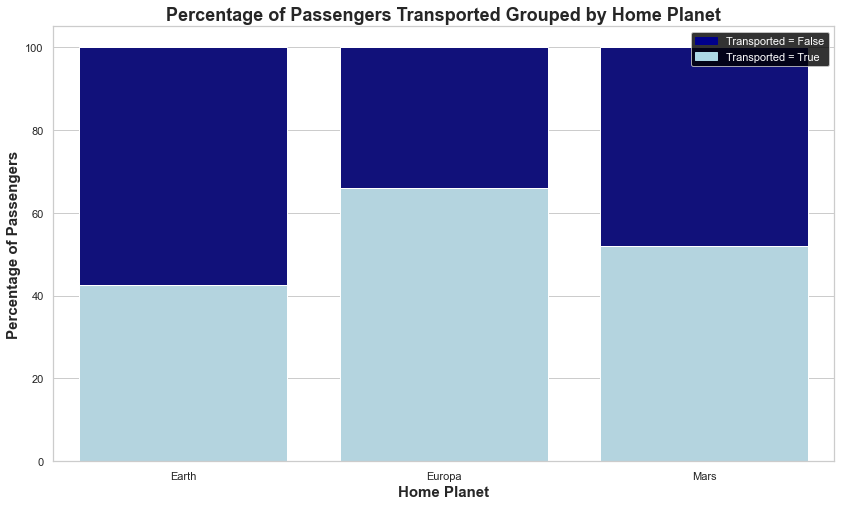

In [10]:
# HOME PLANET VS TRANSPORTED

# set plot style: white grid in the background:
sns.set(style='whitegrid')

# set the figure size
plt.figure(figsize=(14, 8))

# from raw value to percentage
total = df_train[['HomePlanet', 'Transported']].value_counts().reset_index(name='Count')
final_total = total.groupby('HomePlanet').sum().reset_index()
transported = df_train[df_train.Transported==True][['HomePlanet', 'Transported']].value_counts().reset_index(name='Count')
transported['Count_p'] = [i / j * 100 for i,j in zip(transported['Count'], final_total['Count'])]
total['Count_p'] = [i / j * 100 for i,j in zip(total['Count'], total['Count'])]

# bar chart 1 -> top bars (group of 'Transported=False')
bar1 = sns.barplot(x="HomePlanet",  y="Count_p", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Transported=True')
bar2 = sns.barplot(x="HomePlanet", y="Count_p", data=transported, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Transported = False')
bottom_bar = mpatches.Patch(color='lightblue', label='Transported = True')
plt.legend(handles=[top_bar, bottom_bar], loc='upper right',facecolor='black', labelcolor='w')

# edit labels
plt.ylabel('Percentage of Passengers', weight='bold', fontsize=15)
plt.xlabel('Home Planet', weight='bold', fontsize=15)
plt.title('Percentage of Passengers Transported Grouped by Home Planet', weight='bold', fontsize=18)


# show the graph
plt.show()

The bar graph above displays the percentage of passengers according to their homeplanets and whether they were transported to an alternate dimension. The data shows that majority of passengers from Europa were transported to an alternate dimension while less than 50% of passengers from Earth were transported to an alternate dimension. It is also important to note that passengers from Mars shows an approximately 50% split between the passengers who were transported and those who were not.This data indicates that if your homeplanet is Europa you had a greater chance of being transported to an alternate dimension than if your homeplanet was Mars or Earth.

**HOW DOES WHETHER A PASSENGER CRYOSLEPT OR NOT IMPACT WHETHER THEY WERE TRANSPORTED TO A NEW DIMENSION**

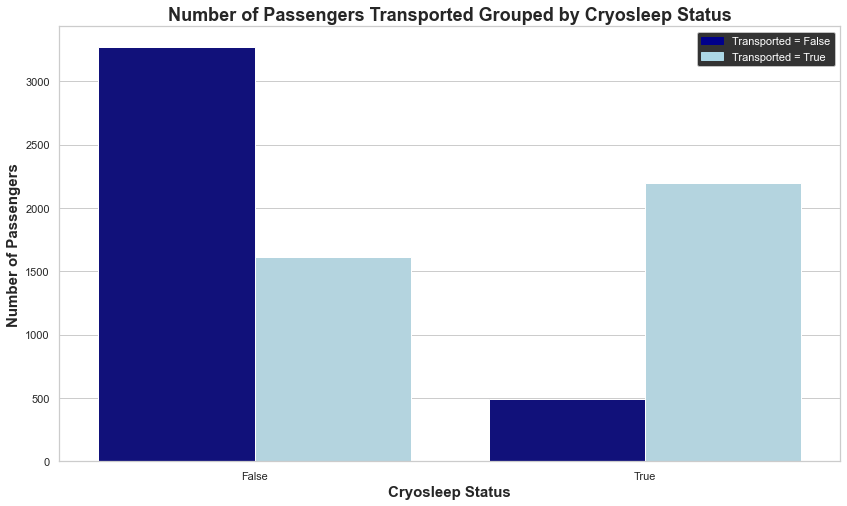

In [11]:
# CRYOSLEEP VS TRANSPORTED

# set plot style: white grid in the background:
sns.set(style='whitegrid')

# create colour palette
colour = {False:'darkblue', True:'lightblue'}

# set the figure size
plt.figure(figsize=(14, 8))

sns.barplot(x= 'CryoSleep',
            y= 'Count',
            hue= 'Transported',
            data= df_train[['CryoSleep', 'Transported']].value_counts().reset_index(name='Count'),
            palette=colour)

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Transported = False')
bottom_bar = mpatches.Patch(color='lightblue', label='Transported = True')
plt.legend(handles=[top_bar, bottom_bar], loc='upper right',facecolor='black', labelcolor='w')

# edit labels
plt.ylabel('Number of Passengers', weight='bold', fontsize=15)
plt.xlabel('Cryosleep Status', weight='bold', fontsize=15)
plt.title('Number of Passengers Transported Grouped by Cryosleep Status', weight='bold', fontsize=18)

# show the graph
plt.show()

The bar graph above displays the number of passengers according to whether or not they cryoslept and whether they were transported to an alternate dimension. The data shows that majority of passengers who cryoslept were transported to an alternate dimension while less than 50% of passengers who did not cryosleep were not transported to an alternate dimension. This graph indicates that if you cryoslept you had a greater chance of being transported to an alternate dimension than if you did not cryosleep.

**HOW DOES A PASSENGER'S DESTINATION IMPACT WHETHER THEY WERE TRANSPORTED TO A NEW DIMENSION**

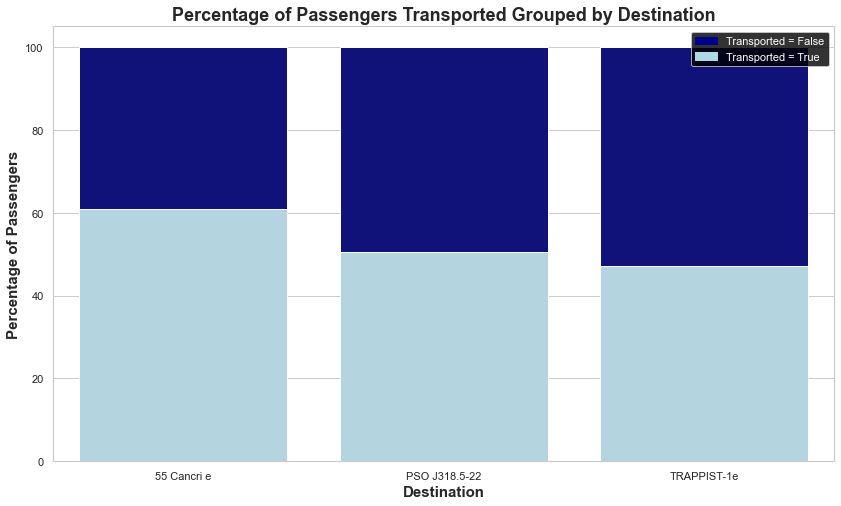

In [12]:
# set plot style: white grid in the background:
sns.set(style='whitegrid')

# set the figure size
plt.figure(figsize=(14, 8))

# from raw value to percentage
total = df_train[['Destination', 'Transported']].value_counts().reset_index(name='Count')
final_total = total.groupby('Destination').sum().reset_index()
transported = df_train[df_train.Transported==True][['Destination', 'Transported']].value_counts().reset_index(name='Count')
transported.sort_values(by='Destination',inplace=True)
transported['Count_p'] = [i / j * 100 for i,j in zip(transported['Count'], final_total['Count'])]
total['Count_p'] = [i / j * 100 for i,j in zip(total['Count'], total['Count'])]

# bar chart 1 -> top bars (group of 'Transported=False')
bar1 = sns.barplot(x="Destination",  y="Count_p", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Transported=True')
bar2 = sns.barplot(x="Destination", y="Count_p", data=transported, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Transported = False')
bottom_bar = mpatches.Patch(color='lightblue', label='Transported = True')
plt.legend(handles=[top_bar, bottom_bar], loc='upper right',facecolor='black', labelcolor='w')

# edit labels
plt.ylabel('Percentage of Passengers', weight='bold', fontsize=15)
plt.xlabel('Destination', weight='bold', fontsize=15)
plt.title('Percentage of Passengers Transported Grouped by Destination', weight='bold', fontsize=18)


# show the graph
plt.show()

The graph above shows the relationship between the final destination of the passengers and whether they were transported to an alternate dimension. The percentage of those who were and were not transported average around 50-60 percent for all of the destinations. This points to the assumption that the final destination of the passengers had little to no impact on whether they were transported to an alternate dimension.

**HOW DOES A PASSENGER'S VIP STATUS IMPACT WHETHER THEY WERE TRANSPORTED TO A NEW DIMENSION**

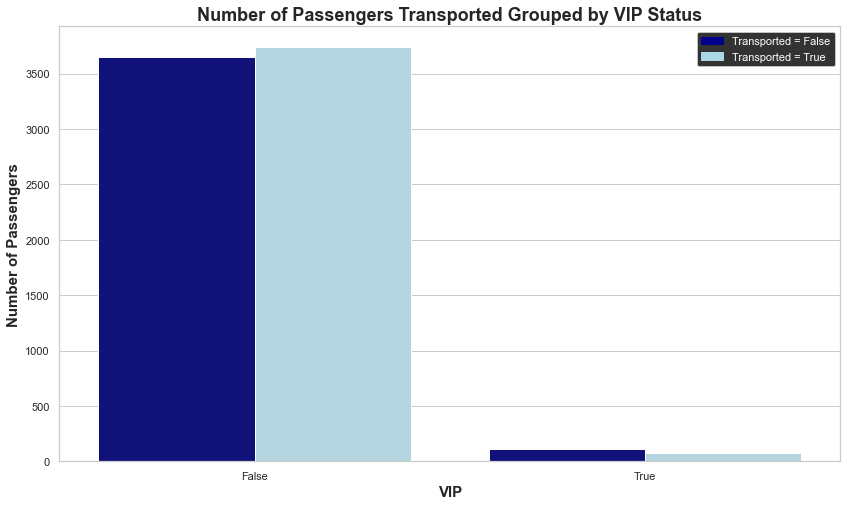

In [13]:
# set plot style: white grid in the background:
sns.set(style='whitegrid')

# create colour palette
colour = {False:'darkblue', True:'lightblue'}

# set the figure size
plt.figure(figsize=(14, 8))

# Plot bar graph:

sns.barplot(x= 'VIP',
            y= 'Count',
            hue= 'Transported',
            data= df_train[['VIP', 'Transported']].value_counts().reset_index(name='Count'),
            palette=colour)

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Transported = False')
bottom_bar = mpatches.Patch(color='lightblue', label='Transported = True')
plt.legend(handles=[top_bar, bottom_bar], loc='upper right',facecolor='black', labelcolor='w')

# edit labels
plt.ylabel('Number of Passengers', weight='bold', fontsize=15)
plt.xlabel('VIP', weight='bold', fontsize=15)
plt.title('Number of Passengers Transported Grouped by VIP Status', weight='bold', fontsize=18)

# show the graph
plt.show()

The graph above shows the relationship between the VIP status of the passengers and whether or not they were transported to an alternate dimension. The graph indicates little to no relationship between the VIP status of a passenger and the probability of them being transported to an alternate dimension.

**HOW DOES A PASSENGER'S AGE IMPACT WHETHER THEY GET TRANSPORTED TO A NEW DIMENSION**

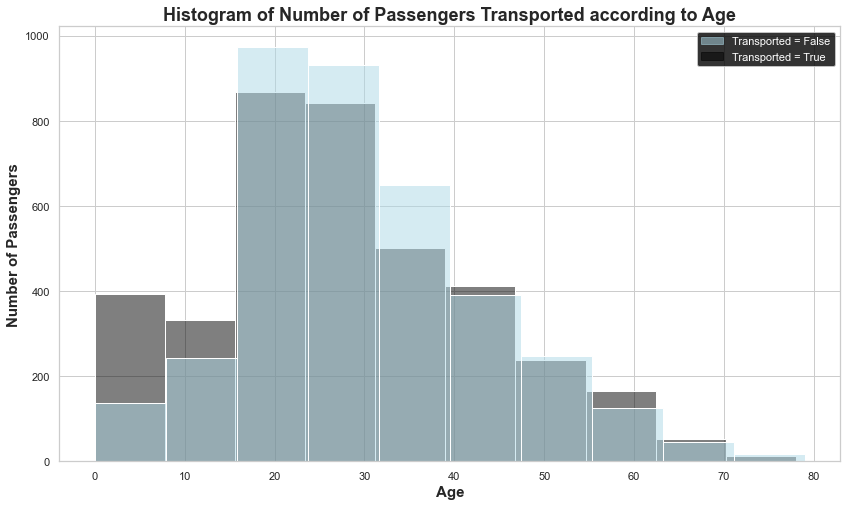

In [14]:
# set plot style: white grid in the background:
sns.set(style='whitegrid')

# set the figure size
plt.figure(figsize=(14, 8))

not_transported = df_train[df_train['Transported'] == False]
transported = df_train[df_train['Transported'] == True]

sns.histplot(transported, x='Age', bins=10, color='black', alpha=0.5)
sns.histplot(not_transported, x='Age', bins=10, color='lightblue', alpha=0.5)


# add legend
top_bar = mpatches.Patch(color='lightblue', label='Transported = False',alpha=0.5)
bottom_bar = mpatches.Patch(color='black', label='Transported = True',alpha=0.5)
plt.legend(handles=[top_bar, bottom_bar], loc='upper right',facecolor='black', labelcolor='w')

# edit labels
plt.ylabel('Number of Passengers', weight='bold', fontsize=15)
plt.xlabel('Age', weight='bold', fontsize=15)
plt.title('Histogram of Number of Passengers Transported according to Age', weight='bold', fontsize=18)

# show the graph
plt.show()

The histograms above show the age distribution of the passengers with the black being the passengers who were transported to an alternate dimension and the light blue being the passengers who were not transported to an alternate dimension.
Both these groups are skewed to the right, however the graph indicating those who were transported (black graph) is slightly more skewed to the right than the one indicating those who were not transported (lightblue graph). This indicates that more of the younger passengers were transported to an alternate dimension than older passengers, i.e., the younger you are the more likely you would have been transported to an alternate dimension during the incident. 

<a id='conclusions'></a>
## CONCLUSIONS

Looking at the graphs in the Exploratory Data Analysis, the following conclusions were drawn:
* Passengers who's homeplanet is Europa have a greater chance of being transported to an alternate dimension.
* Passengers who chose to cryosleep have a greater chance of being transported to an alternate dimension.
* No obvious correlation between the final destination of the passengers and the chance of them being transported to an alternate dimension
* No obvious correlation between VIP status of the passengers and the chance of them being transported to an alternate dimension
* Younger passengers have a slightly higher chance of being transported to an alternate dimension

Based on the analysis performed above the only clear correlation is between the Homeplanet of the passenger and their transported status.Altough collectively the other factors may play a role in whether or not a passenger gets transported to an alternate dimension, individually they show very little evidence of that. Age shows some evidence of impacting the transported variable with younger passengers being more likely to be transported than older passengers.